In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
from collections import Counter

In [2]:
pd.set_option('display.max_columns', None)
dfInit = pd.read_csv('./stroke_data.csv', delimiter=',', encoding='utf8')
df = dfInit.copy(deep=True)
dfCopy = df.copy(deep=True)
sesSet = set(df["SES"])
display(df)

,Age,Gender,SES,Hypertension,Heart_Disease,BMI,Avg_Glucose,Diabetes,Smoking_Status,Stroke
0,66.788137,Male,Medium,1,0,25.842521,96.428681,1,Current,1
1,86.393609,Female,Medium,1,1,32.531061,133.350068,0,Never,1
2,76.158579,Female,Medium,1,0,40.681244,111.489589,0,Never,0
3,72.477870,Female,Low,0,1,33.003193,125.692465,0,Former,0
4,59.881635,Male,Low,0,0,26.062443,123.218486,1,Never,1
...,...,...,...,...,...,...,...,...,...,...
9995,80.647182,Female,Medium,1,1,28.283629,128.639802,0,Former,1
9996,82.607321,Female,Medium,1,1,31.148301,105.025226,1,Current,1
9997,86.020702,Female,High,1,1,32.641037,147.174095,0,Never,1
9998,67.387542,Female,Medium,0,1,29.946547,112.480515,0,Former,0


In [3]:
genderDict = { "Male" : 0, "Female" : 1 }
sesDict = {"Low" : 0, "Medium" : 0.5, "High" : 1 }
smokingStatusDict = { "Never" : 0, "Former" : 0.5, "Current" : 1}
df["Gender"] = df["Gender"].map(lambda elem : genderDict[elem])
df["SES"] = df["SES"].map(lambda elem : sesDict[elem])
df["Smoking_Status"] = df["Smoking_Status"].map(lambda elem : smokingStatusDict[elem])
display(df)

,Age,Gender,SES,Hypertension,Heart_Disease,BMI,Avg_Glucose,Diabetes,Smoking_Status,Stroke
0,66.788137,0,0.5,1,0,25.842521,96.428681,1,1.0,1
1,86.393609,1,0.5,1,1,32.531061,133.350068,0,0.0,1
2,76.158579,1,0.5,1,0,40.681244,111.489589,0,0.0,0
3,72.477870,1,0.0,0,1,33.003193,125.692465,0,0.5,0
4,59.881635,0,0.0,0,0,26.062443,123.218486,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...
9995,80.647182,1,0.5,1,1,28.283629,128.639802,0,0.5,1
9996,82.607321,1,0.5,1,1,31.148301,105.025226,1,1.0,1
9997,86.020702,1,1.0,1,1,32.641037,147.174095,0,0.0,1
9998,67.387542,1,0.5,0,1,29.946547,112.480515,0,0.5,0


In [4]:
#dfCopy = df.copy(deep=True)
# df = pd.DataFrame(data=StandardScaler().fit_transform(df), columns=df.columns)
# display(df)

<Axes: >

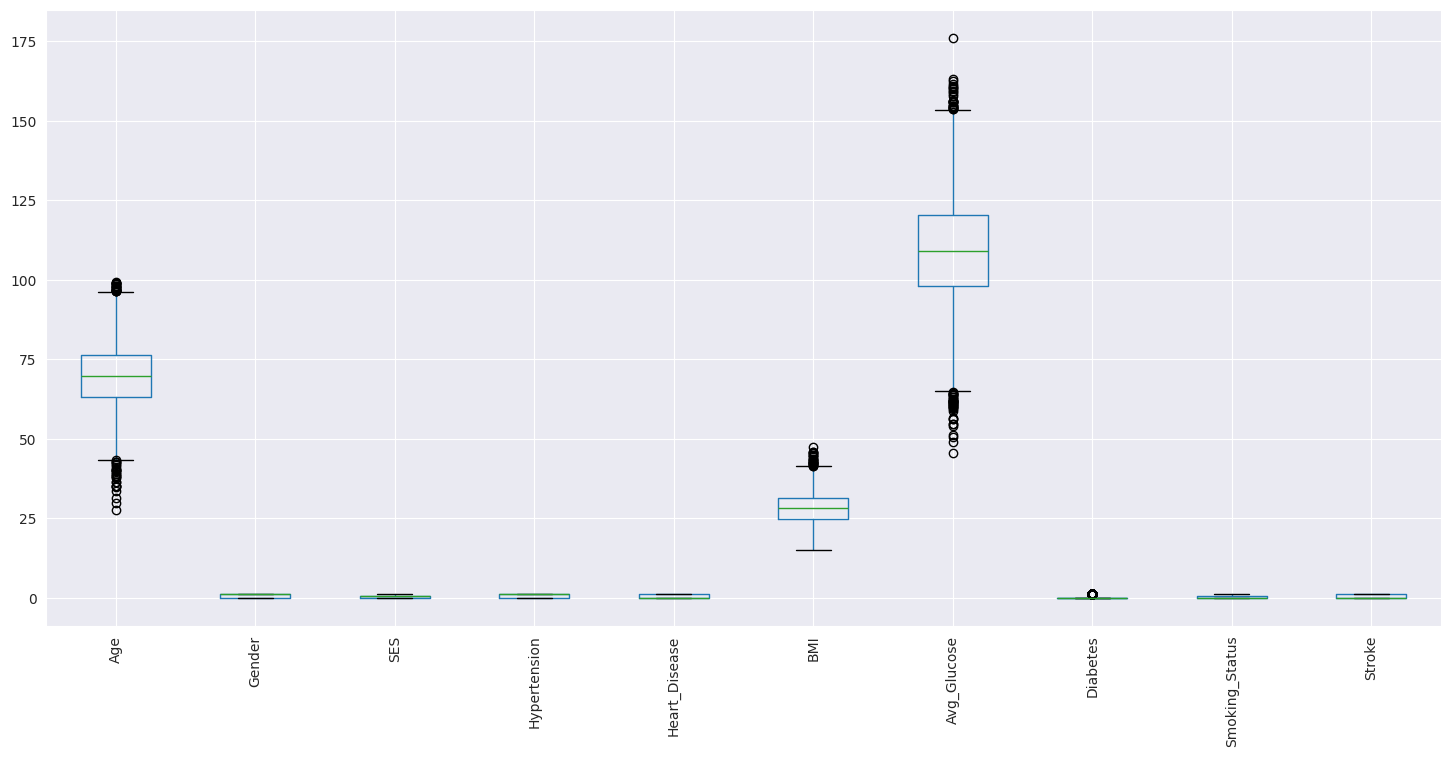

In [5]:
ax = df.boxplot(column=list(df.columns),figsize=(18,8))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
display(ax)

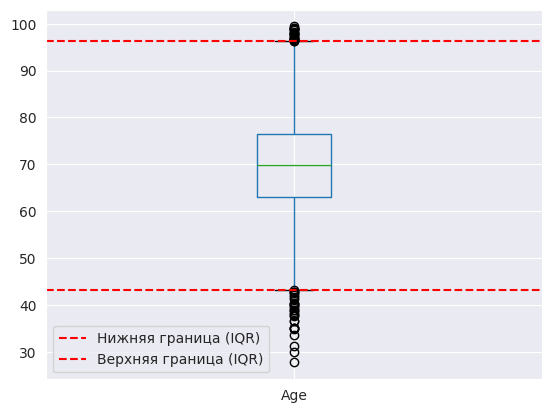

In [6]:
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df.boxplot(column=["Age"])
plt.axhline(lower, color="red", linestyle="--", label="Нижняя граница (IQR)")
plt.axhline(upper, color="red", linestyle="--", label="Верхняя граница (IQR)")
plt.legend()
plt.show()

In [7]:
toDeleteUpper = df[df["Age"] > upper].index
toDeleteLower = df[df["Age"] < lower].index
df = df.drop(toDeleteUpper, axis=0)
df = df.drop(toDeleteLower, axis=0)
dfCopy = dfCopy.drop(toDeleteUpper, axis=0)
dfCopy = dfCopy.drop(toDeleteLower, axis=0)

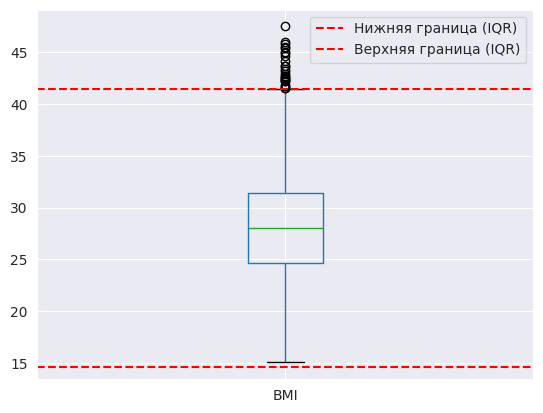

In [8]:
Q1 = df["BMI"].quantile(0.25)
Q3 = df["BMI"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df.boxplot(column=["BMI"])
plt.axhline(lower, color="red", linestyle="--", label="Нижняя граница (IQR)")
plt.axhline(upper, color="red", linestyle="--", label="Верхняя граница (IQR)")
plt.legend()
plt.show()

In [9]:
toDeleteUpper = df[df["BMI"] > upper].index
df = df.drop(toDeleteUpper, axis=0)
dfCopy = dfCopy.drop(toDeleteUpper, axis=0)

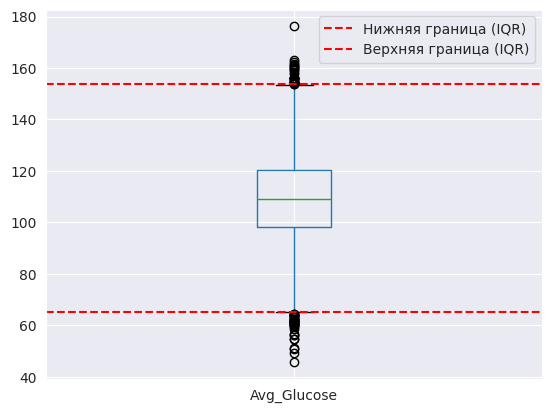

In [10]:
Q1 = df["Avg_Glucose"].quantile(0.25)
Q3 = df["Avg_Glucose"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df.boxplot(column=["Avg_Glucose"])
plt.axhline(lower, color="red", linestyle="--", label="Нижняя граница (IQR)")
plt.axhline(upper, color="red", linestyle="--", label="Верхняя граница (IQR)")
plt.legend()
plt.show()

In [11]:
toDeleteUpper = df[df["Avg_Glucose"] > upper].index
toDeleteLower = df[df["Avg_Glucose"] < lower].index
df = df.drop(toDeleteUpper, axis=0)
df = df.drop(toDeleteLower, axis=0)
dfCopy = dfCopy.drop(toDeleteUpper, axis=0)
dfCopy = dfCopy.drop(toDeleteLower, axis=0)

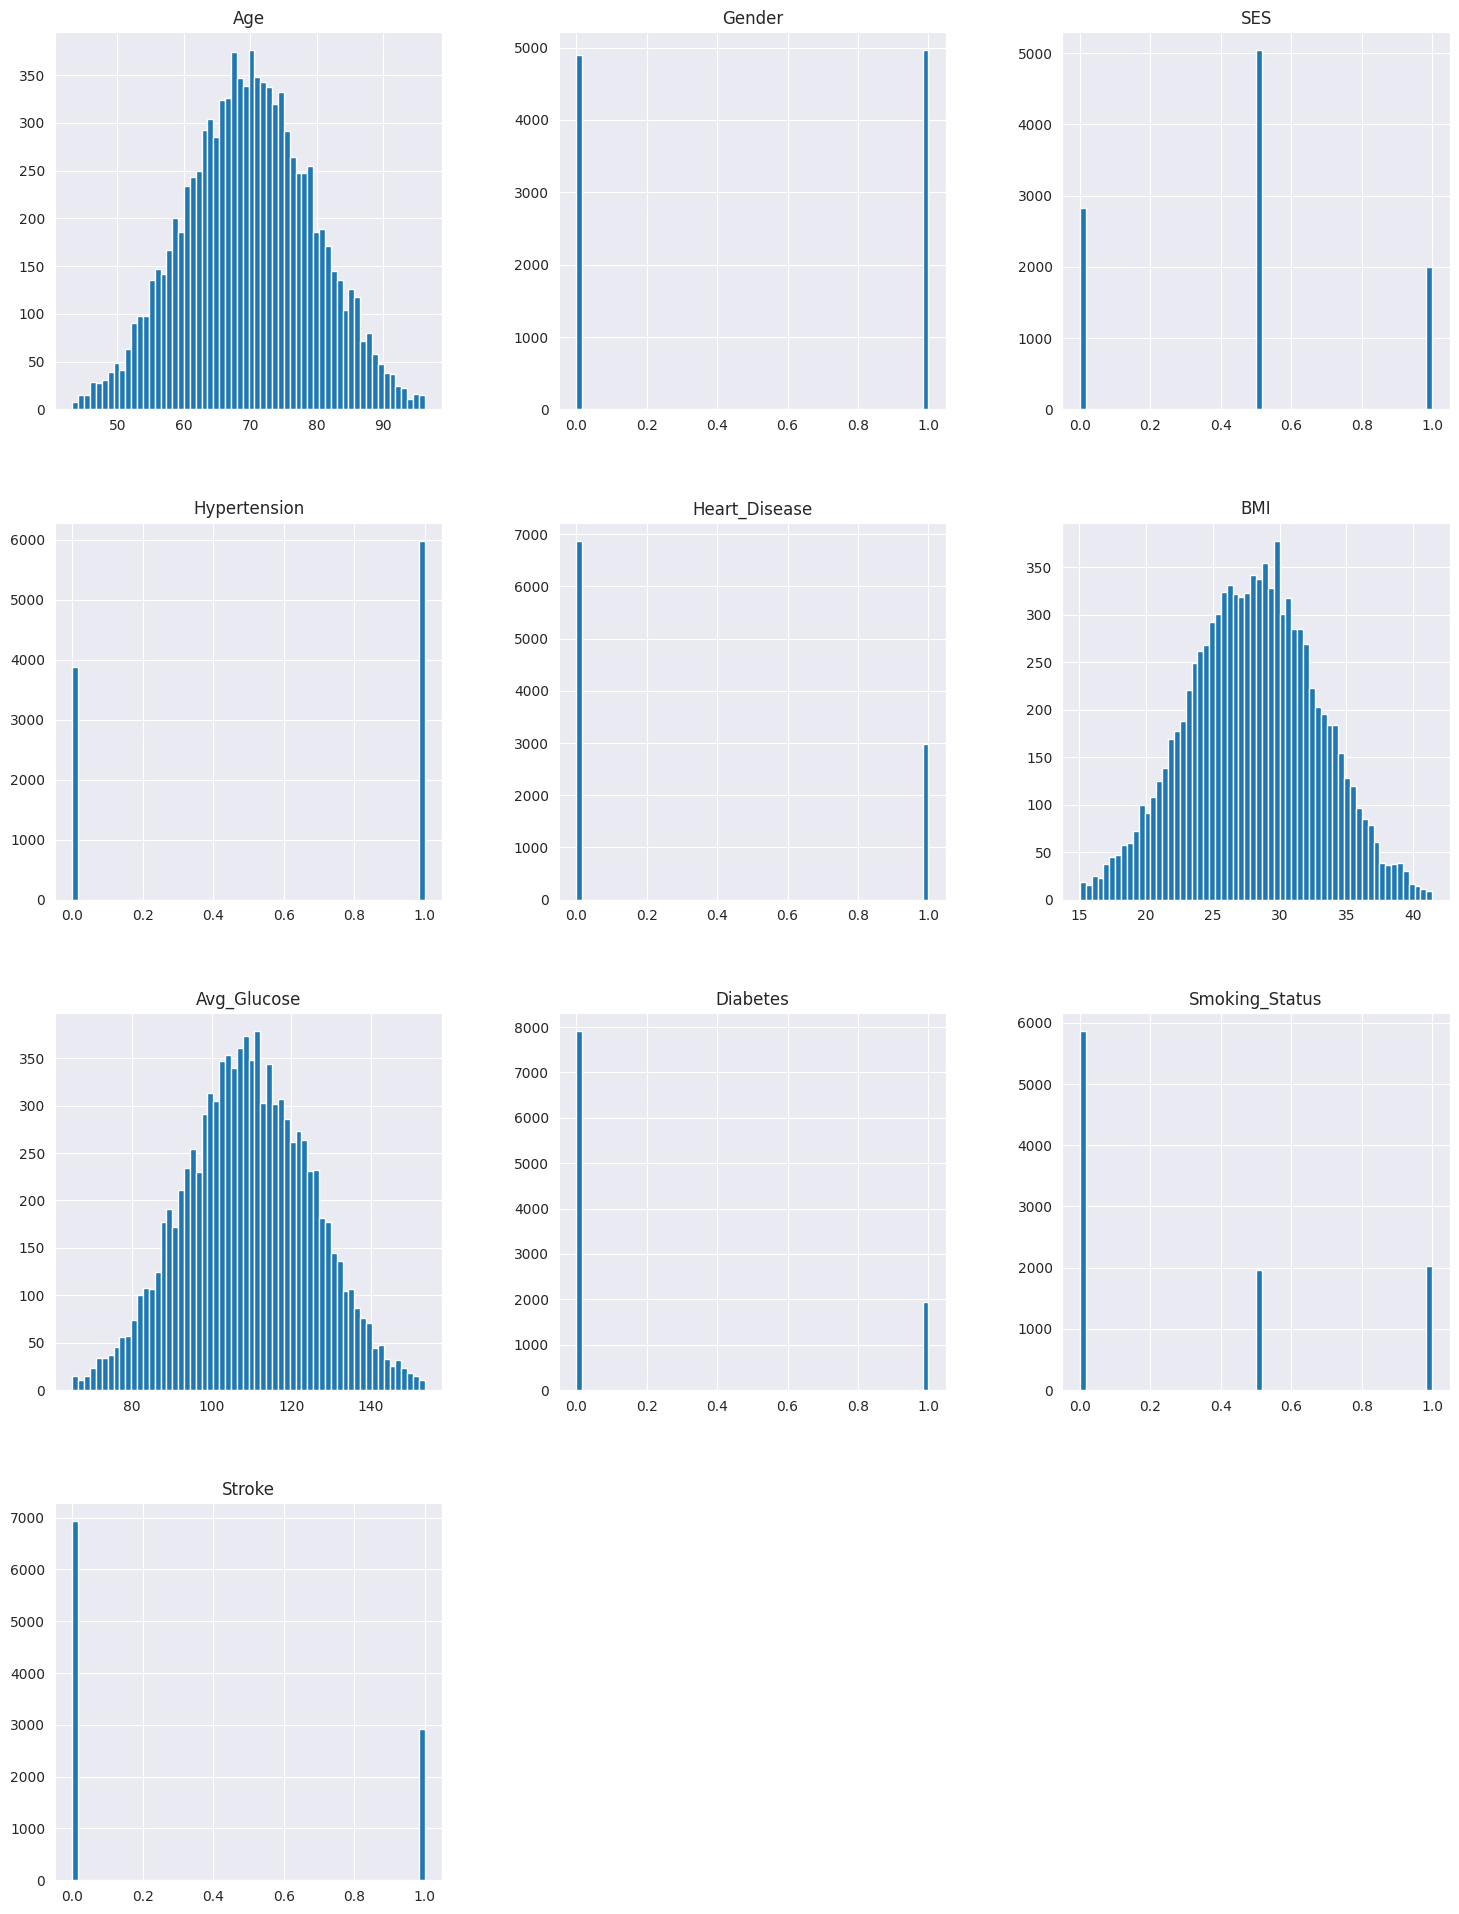

In [12]:
df.hist(bins=60, figsize=(18,24), grid=True)
plt.show()

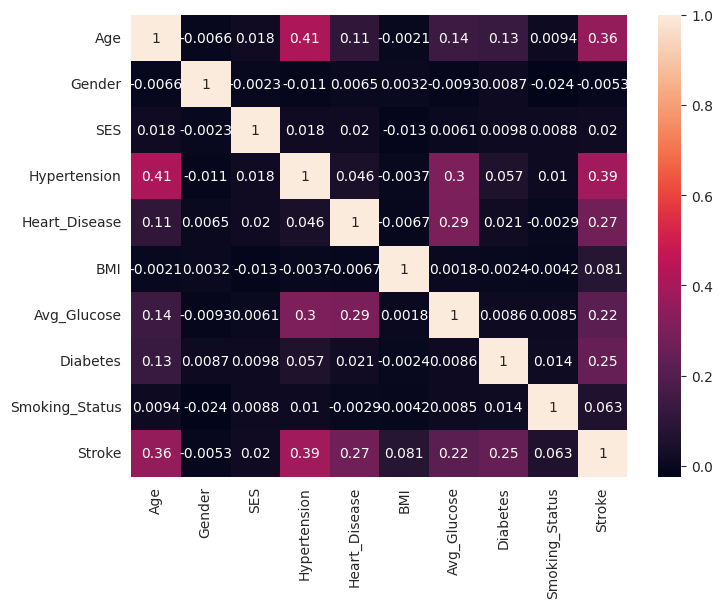

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [14]:
import umap
features = df[
    [
    "Age",
    "BMI",
    "Avg_Glucose",
    "Smoking_Status",
    "Stroke",
    "Gender",
    "Hypertension",
    "Heart_Disease",
    "Diabetes",
    ]
].values
scaled_data = StandardScaler().fit_transform(features)
emb = PCA(n_components=2).fit_transform(scaled_data)

emb.shape


/home/artemborisov/PycharmProjects/PythonProject/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(9855, 2)

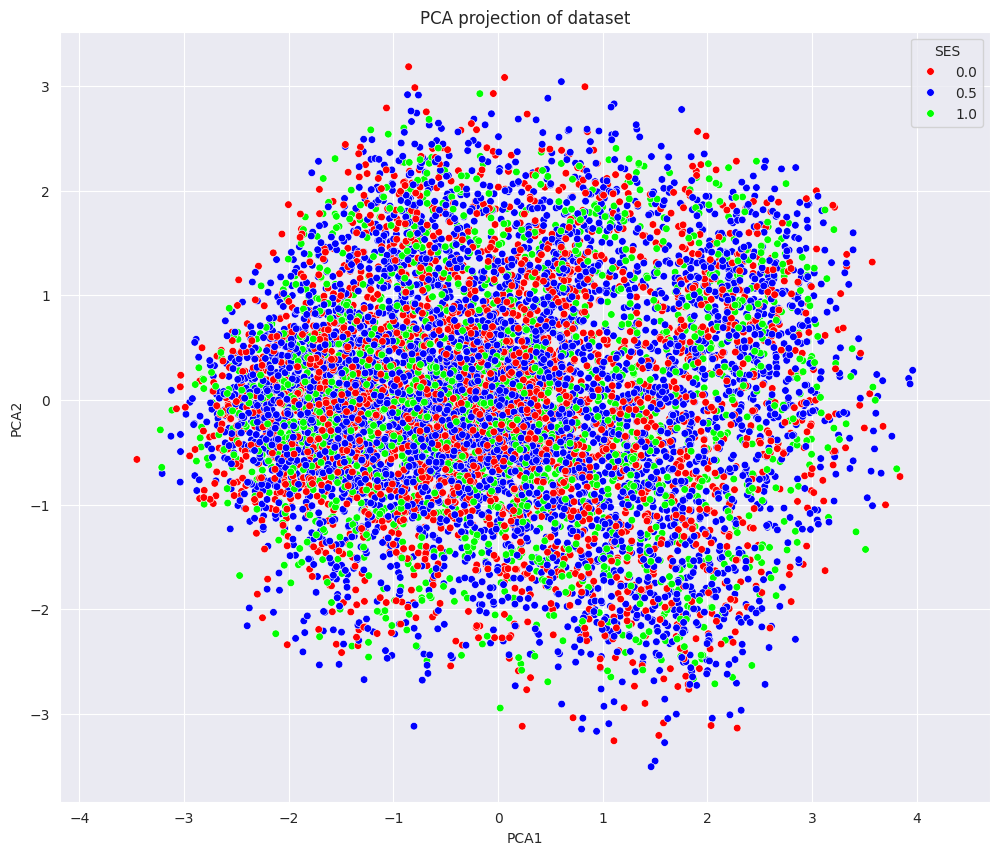

In [15]:
def float_to_int(x):
    if x == 0.:
        return 0
    elif x == 0.5:
        return 1
    else:
        return 2

custom_palette = ["#FF0000", "#0000FF", "#00FF00"]
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x=emb[:, 0], y=emb[:, 1],
    palette=custom_palette,
    hue=df.SES,
    s=30
)

plt.gca().set_aspect("equal", "datalim")
#plt.legend(title="SES", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
#plt.title("UMAP projection of dataset")
plt.title("PCA projection of dataset")
plt.show()

<Figure size 1000x1000 with 0 Axes>

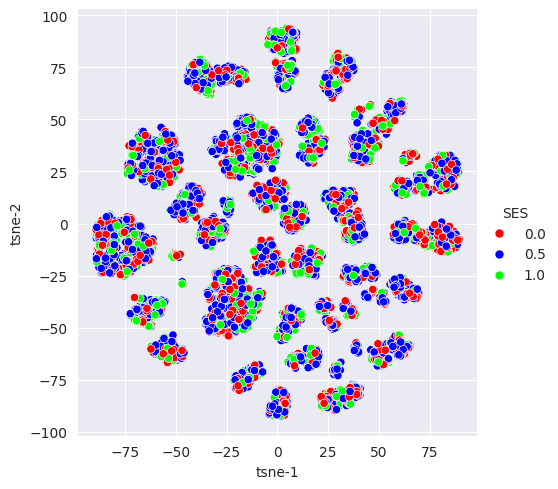

In [16]:
subsetLen = len(df)
subsetDf = df[:subsetLen]

tSNEModel = TSNE()
tSNEData = tSNEModel.fit_transform(scaled_data)

tSNEDf = pd.DataFrame()
tSNEDf['tsne-1'] = tSNEData[:, 0]
tSNEDf['tsne-2'] = tSNEData[:, 1]
tSNEDf['SES'] = df["SES"]


plt.figure(figsize=(10, 10))
sns.relplot(x='tsne-1', y='tsne-2', palette=custom_palette, hue=df.SES, data=tSNEDf)
plt.show()


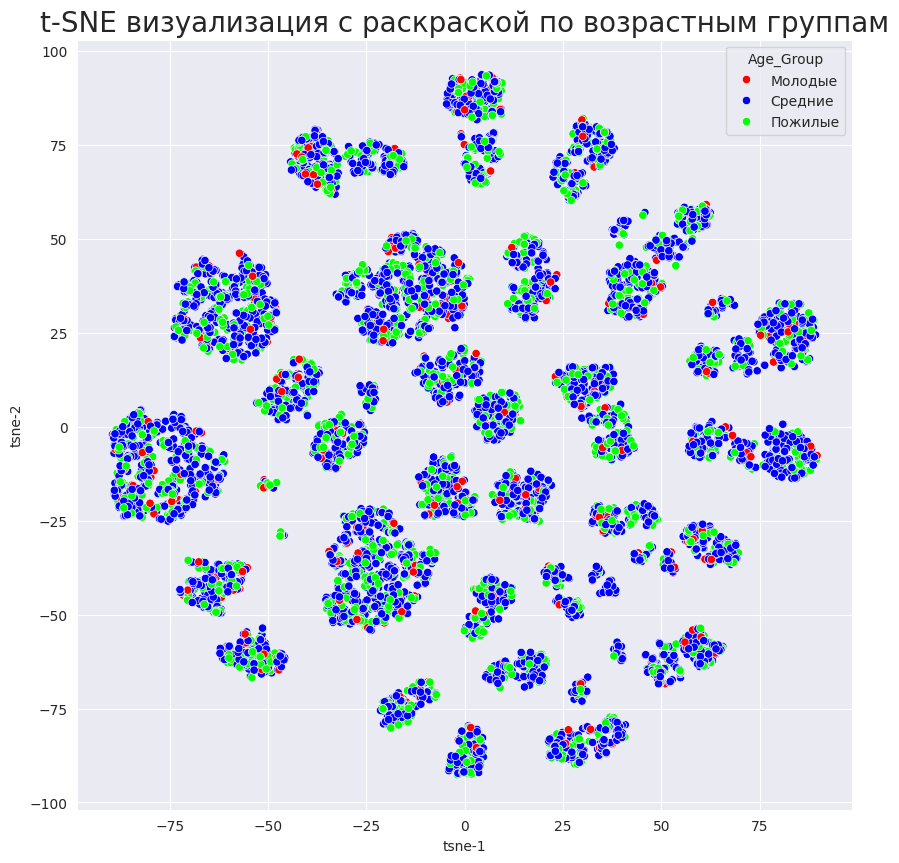

In [17]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 55, 75, 95], labels=['Молодые', 'Средние', 'Пожилые'])
tSNEDf['Age_Group'] = df['Age_Group']
plt.figure(figsize=(10, 10))

sns.scatterplot(
    x='tsne-1',
    y='tsne-2',
    hue=df.Age_Group,
    palette=custom_palette,
    data=tSNEDf
)
plt.title("t-SNE визуализация с раскраской по возрастным группам", fontsize=20)
plt.show()

/home/artemborisov/PycharmProjects/PythonProject/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


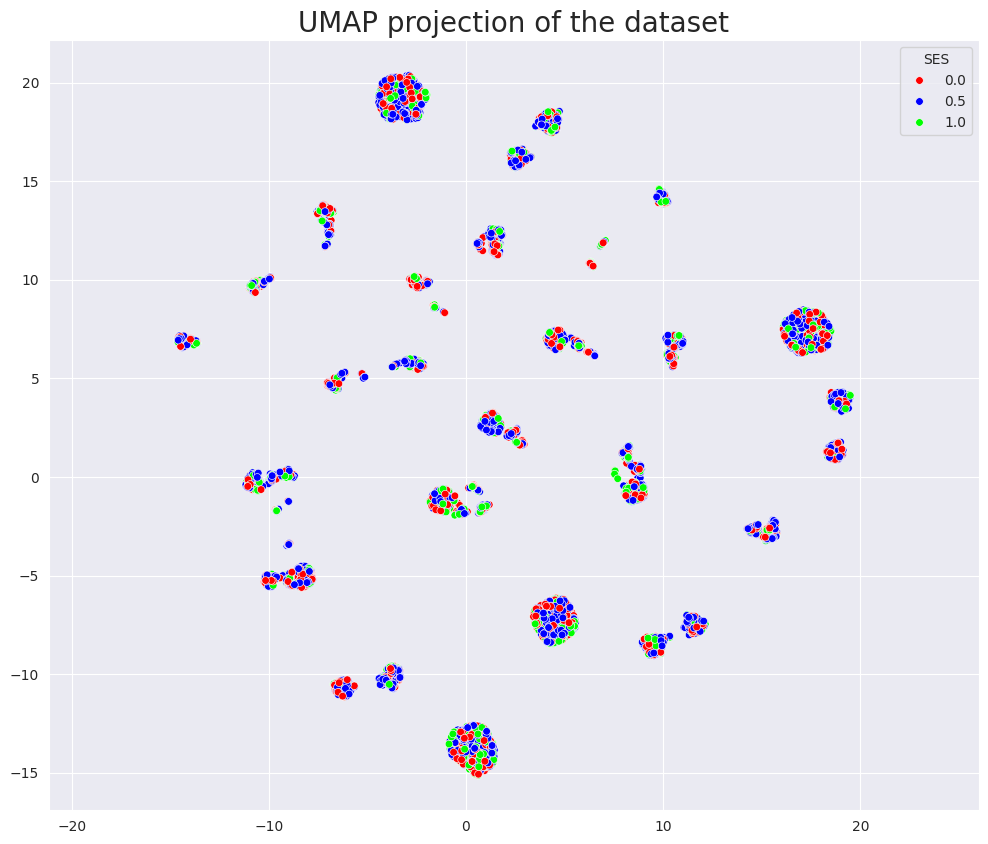

In [18]:
model = umap.UMAP().fit_transform(scaled_data)
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x=model[:, 0], y=model[:, 1],
    palette=custom_palette,
    hue=df.SES,
    s=30
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the dataset', fontsize=20)
plt.show()